In [131]:
#https://www.comet.com/site/blog/different-plots-used-in-exploratory-data-analysis-eda/
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
#https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
#https://assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf
#https://www.learnpytorch.io/pytorch_cheatsheet/
#https://stackoverflow.com/questions/27275236/how-to-select-all-columns-whose-names-start-with-x-in-a-pandas-dataframe (2nd answer is the best)
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html
#https://towardsdatascience.com/select-features-for-machine-learning-model-with-mutual-information-534fe387d5c8/

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
df = pd.read_csv('categories.csv')
df.head(10) # Display the first 10 rows of the dataframe - no print means it will be displayed in the IDE

,img_name,location,time_of_day,skyCondition,setting
0,a0001-jmac_DSC1459,outdoor,day,sun_sky,nature
1,a0002-dgw_005,indoor,day,mixed,people
2,a0003-NKIM_MG_8178,outdoor,day,sun_sky,man_made
3,a0004-jmac_MG_1384,outdoor,day,sun_sky,nature
4,a0005-jn_2007_05_10__564,outdoor,day,sun_sky,man_made
5,a0006-IMG_2787,outdoor,day,sun_sky,animals
6,a0007-IMG_2480,outdoor,day,sun_sky,man_made
7,a0008-WP_CRW_3959,indoor,unknown,artificial,people
8,a0009-kme_372,indoor,day,NaN,NaN
9,a0010-jmac_MG_4807,outdoor,day,sun_sky,nature


Text(0.5, 1.0, 'Count of Settings')

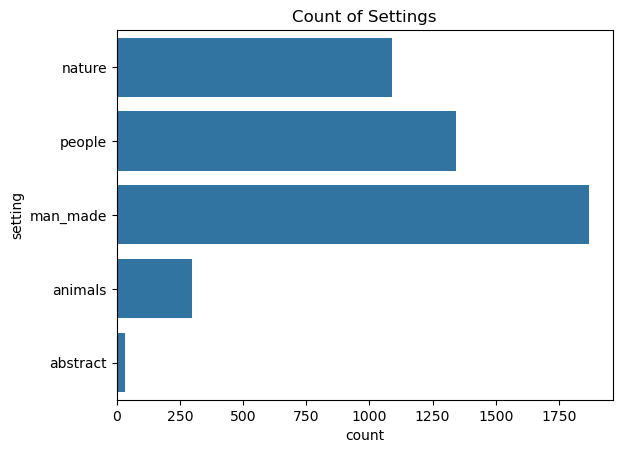

In [134]:
sns.countplot(df['setting'])
plt.title('Count of Settings')

Text(0.5, 1.0, 'Count of Sky Conditions')

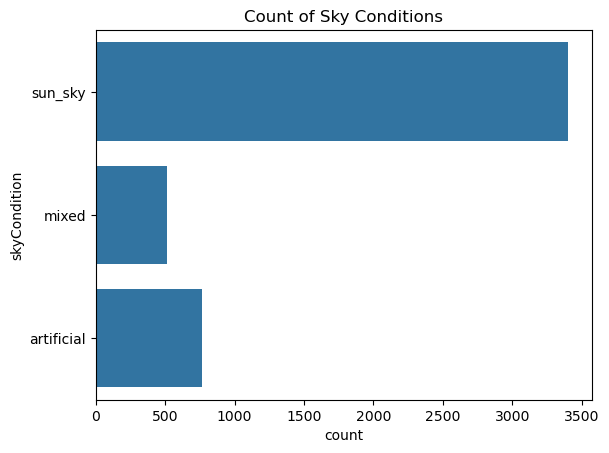

In [135]:
sns.countplot(df['skyCondition'])
plt.title('Count of Sky Conditions')

In [170]:
total_location_setting = df[['location','setting']] #Demoing how to select multiple columns from a dataframe
total_location_setting.head(10)

,location,setting
0,outdoor,nature
1,indoor,people
2,outdoor,man_made
3,outdoor,nature
4,outdoor,man_made
5,outdoor,animals
6,outdoor,man_made
7,indoor,people
8,indoor,NaN
9,outdoor,nature


In [136]:
#Python you can use [] to build a list comprehension, so you can do something like this:
missing_column_names = [col for col in df.columns if df[col].isnull().any()] #for col in df.columns, if any of the values in that column are null, add the column name to the list via col variable
print("Columns with missing values:", missing_column_names)

Columns with missing values: ['location', 'time_of_day', 'skyCondition', 'setting']


In [137]:
#Lambda map
#axis_1 is the column axis, axis_0 is the row axis
count_values_per_column = [df.apply(lambda col: col.count(), axis=0)] #map the count function for each row in the dataframe (axis=0 means rows)
print("Columns with count values:", count_values_per_column)

Columns with count values: [img_name        5000
location        4925
time_of_day     4821
skyCondition    4681
setting         4634
dtype: int64]


<Axes: >

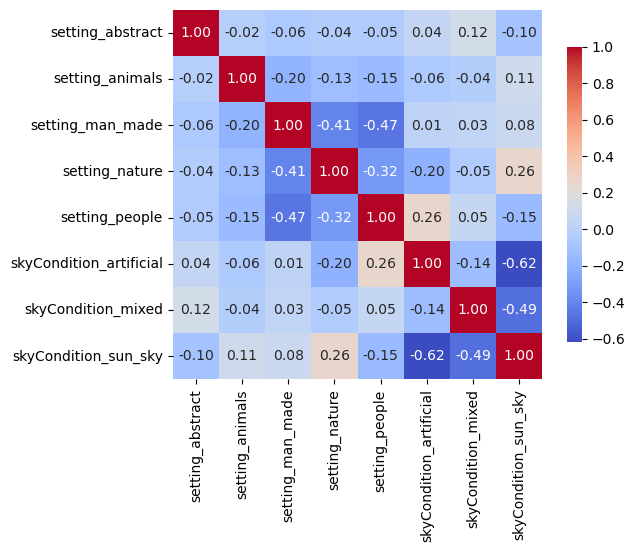

In [139]:
#Find the correlation matrix between the columns - setting and skyCondition
#Break into one hot encoded columns

#I did the same thing below, in a different way both work.
matrix_plot_data = pd.get_dummies(df, columns=['setting', 'skyCondition'], dtype=int)
matrix_plot_corr = matrix_plot_data[matrix_plot_data.columns[1:]].corr(numeric_only=True) #avoids error with non-numeric columns
sns.heatmap(matrix_plot_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

Index(['man_made', 'people', 'nature', 'animals', 'abstract'], dtype='object', name='setting')


<Axes: xlabel='setting', ylabel='count'>

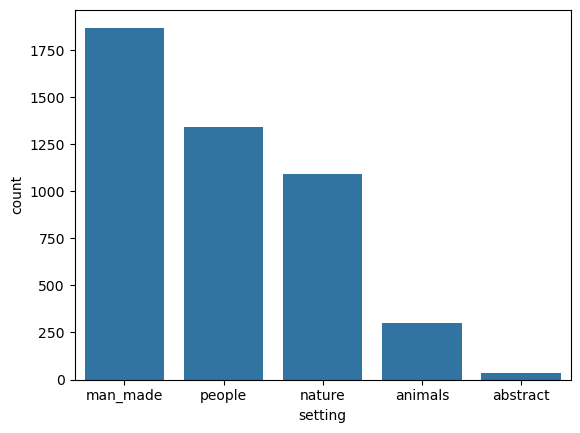

In [140]:
#Get count of all unique values in the 'setting' column
setting_counts = df['setting'].value_counts()
# Create a bar plot of the counts
print(setting_counts.index) #Gives you the name of the unique values in the 'setting' column
sns.barplot(x=setting_counts.index, y=setting_counts)

<Axes: xlabel='location', ylabel='count'>

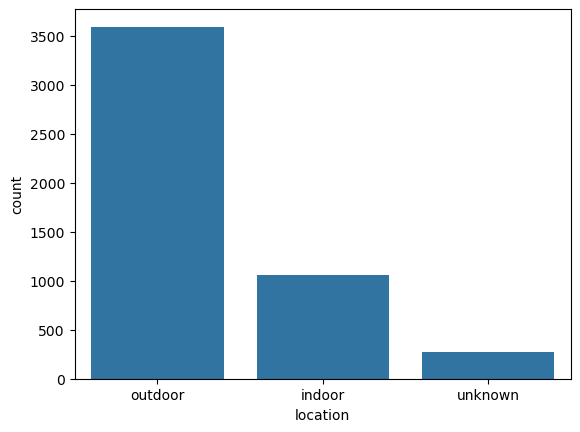

In [141]:
location_counts = df['location'].value_counts()
sns.barplot(x=location_counts.index, y=location_counts)

In [142]:
#I think the first outputs of the model will be location and setting, but we have a big imbalance in the dataset
# Let's check the distribution of the target variable

Change of plan, lets see if the variables, all of which (excluding img_name) will be used as labels, are correlated with each other using Pearson correlation / correlation matrix.

In [143]:
# Get the correlation matrix for  columns in the dataframe apart from 'img_name' (because this will be our input feature when it becomes an image)
one_hot_encoded_df = pd.get_dummies(df, columns=df.columns, dtype=int)  # Exclude the first column

<Axes: >

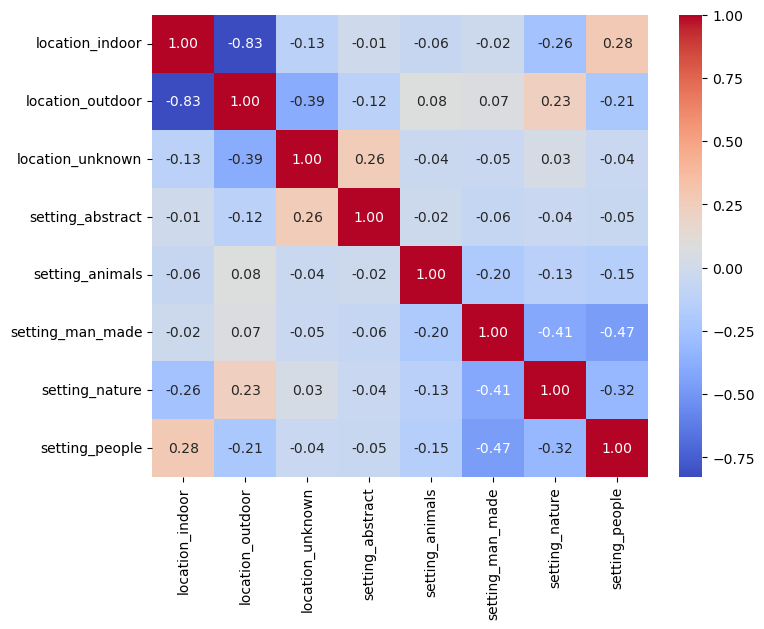

In [144]:
#Get correlation matrix for 'location' and 'setting'
filtered_col = []
for col in one_hot_encoded_df.columns:
    if 'location' in col or 'setting' in col:
        filtered_col.append(col)
#Get all columns which names contain 'location' and 'setting' (one-hot encodings for location and setting)
location_setting_corr = one_hot_encoded_df[filtered_col].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(location_setting_corr, annot=True, fmt=".2f", cmap='coolwarm')

No point look at labels from the same category i.e setting_people and setting_nature, they are mutually exclusive.

Look at correlations between labels from different categories i.e setting_nature and location_outdoor (slightly positive correlation)

+ value means that the labels are positively correlated, - value means that the labels are negatively correlated

<Axes: >

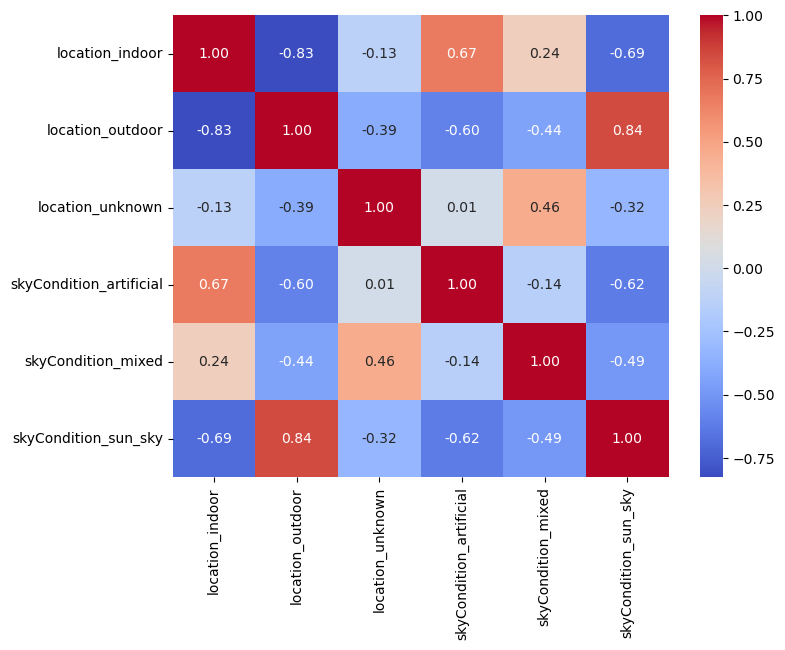

In [145]:
# Get the correlation matrix for 'location' and 'skyCondition'
filtered_col = []

#Get all columns which names contain 'location' and 'skyCondition' (one-hot encodings for location and skyCondition)
for col in one_hot_encoded_df.columns:
    if 'location' in col or 'skyCondition' in col:
        filtered_col.append(col)

location_skyCondition_corr = one_hot_encoded_df[filtered_col].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(location_skyCondition_corr, annot=True, fmt=".2f", cmap='coolwarm')

Very strong correlations between location_outdoor and skyCondition_sun_sky - sort of to be expected, no one wants to take a photo in the rain in an outdoor location, so if the location is outdoor, the sky condition is likely to be sunny.

These labels for both setting, location and skyCondition seem to be quite correlated, so adding them  all back might help the model learn better.

that being said, they likely aren't giving much new information (because they are correlated), but that's not overly concerning given good low training score, hopefully adding these correlated labels will help the model with generalization and not overfitting.

In [146]:
#BELOW EXPLAINS WHY I DIDN'T DO MUTUAL INFORMATION ANALYSIS

Doing Mutual information now between the columns to see how much each label impacts uncertainty in the other labels. This will help us understand how much information each label provides about the others.

So i didn't end up doing this mutual information analysis, mutual_info_classif is very much designed to take in model inputs / feature values and model outputs / labels. Not really able to use it to compare labels against each other.

Seems like it would work great for feature selection if you use it as designed, comparing input features (x) against output labels (y), but not so much for comparing labels against each other.
.